### 1. Import for all Libraries

In [6]:
import regex as re
import pandas as pd

# Set display options for pandas in Jupyter Notebook
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Use maximum width available
pd.set_option('display.max_colwidth', -1)  # Show full width of showing columns
pd.set_option('display.expand_frame_repr', False)  # Disable wrapping of data

#### If you ever need to delete the specific files. 

Not necessary unless have soemthign causing duplicate file naming or looping over files iteratively and incorporating them causing duplicate data

In [29]:
import os

def delete_specific_files(root_dir, filenames_to_delete):
    for subdir, dirs, files in os.walk(root_dir):
        for filename in files:
            if filename in filenames_to_delete:
                file_path = os.path.join(subdir, filename)
                os.remove(file_path)
                print(f"Deleted: {file_path}")

# Usage
root_directory = r'C:\Users\mattt\Documents\mutants'  # Replace with your root directory path
files_to_delete = ['concatenated_bacteria.csv', 'concatenated_maxima.csv']
delete_specific_files(root_directory, files_to_delete)


## Concatenating csv's at different directory levels

In [30]:

def concatenate_csvs_in_outlines(root_dir):
    root_dir_length = len(root_dir)
    for subdir, dirs, files in os.walk(root_dir):
        if 'outlines' in subdir:
            bacteria_files = []
            maxima_files = []
            for file in files:
                if file.endswith('_bacteria.csv'):
                    bacteria_files.append(os.path.join(subdir, file))
                elif file.endswith('_maxima1.csv') or file.endswith('_maxima2.csv'):
                    maxima_files.append(os.path.join(subdir, file))

            if bacteria_files:
                bacteria_bacteria_data = pd.concat([pd.read_csv(f).assign(file_path=os.path.relpath(f, root_dir).replace('\\', '/')) for f in bacteria_files])
                bacteria_bacteria_data.to_csv(os.path.join(subdir, 'concatenated_bac.csv'), index=False)

            if maxima_files:
                maxima_bacteria_data = pd.concat([pd.read_csv(f).assign(file_path=os.path.relpath(f, root_dir).replace('\\', '/')) for f in maxima_files])
                maxima_bacteria_data.to_csv(os.path.join(subdir, 'concatenated_max.csv'), index=False)

# Usage
root_directory = r'C:\Users\mattt\Documents\mutants'  # Replace with your root directory path
concatenate_csvs_in_outlines(root_directory)


In [34]:
def aggregate_strain_date_level(root_dir):
    for subdir, dirs, files in os.walk(root_dir):
        if not any('outlines' in d for d in dirs):  # Skip if no outlines subdirectory
            continue

        strain_date_bacteria = []
        strain_date_maxima = []

        for d in dirs:
            outlines_dir = os.path.join(subdir, d, 'outlines')
            if os.path.exists(outlines_dir):
                bacteria_file = os.path.join(outlines_dir, 'concatenated_bac.csv')
                maxima_file = os.path.join(outlines_dir, 'concatenated_max.csv')
                
                if os.path.exists(bacteria_file):
                    strain_date_bacteria.append(pd.read_csv(bacteria_file))
                if os.path.exists(maxima_file):
                    strain_date_maxima.append(pd.read_csv(maxima_file))

        # Save one directory level up from the current 'subdir'
        save_dir = os.path.dirname(subdir)

        if strain_date_bacteria:
            pd.concat(strain_date_bacteria).to_csv(os.path.join(save_dir, 'date_strain_bac.csv'), index=False)
        if strain_date_maxima:
            pd.concat(strain_date_maxima).to_csv(os.path.join(save_dir, 'date_strain_max.csv'), index=False)


# run
aggregate_strain_date_level(root_directory)


In [41]:

def aggregate_strain_date_level(root_dir):
    for subdir, dirs, files in os.walk(root_dir):
        contains_outlines = any(os.path.isdir(os.path.join(subdir, d, 'outlines')) for d in dirs)
        if not contains_outlines:
            continue

        strain_date_bacteria = []
        strain_date_maxima = []

        for d in dirs:
            outlines_dir = os.path.join(subdir, d, 'outlines')
            if os.path.exists(outlines_dir):
                bacteria_file = os.path.join(outlines_dir, 'concatenated_bac.csv')
                maxima_file = os.path.join(outlines_dir, 'concatenated_max.csv')
                
                if os.path.exists(bacteria_file):
                    strain_date_bacteria.append(pd.read_csv(bacteria_file))
                if os.path.exists(maxima_file):
                    strain_date_maxima.append(pd.read_csv(maxima_file))

        if strain_date_bacteria:
            aggregated_bacteria_path = os.path.join(subdir, 'date_strain_bac.csv')
            pd.concat(strain_date_bacteria).to_csv(aggregated_bacteria_path, index=False)

        if strain_date_maxima:
            aggregated_maxima_path = os.path.join(subdir, 'date_strain_max.csv')
            pd.concat(strain_date_maxima).to_csv(aggregated_maxima_path, index=False)

# run
aggregate_strain_date_level(root_directory)





def find_and_concatenate_csv(folder_path, keyword):
    # Initialize an empty DataFrame to store the concatenated data
    combined_bacteria_data = pd.DataFrame()

    # Traverse through all sub-folders and files in the given folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file is a CSV file and contains the specified keyword
            if file.lower().endswith('.csv') and keyword.lower() in file.lower():
                file_path = os.path.join(root, file)
                
                # Read the CSV file into a DataFrame
                bacteria_data = pd.read_csv(file_path)
                
                # Concatenate the DataFrame to the combined DataFrame
                combined_bacteria_data = pd.concat([combined_maxima_data, bacteria_data], ignore_index=True)

    return combined_bacteria_data

# Specify the folder path and keyword
folder_path = r'C:\Users\mattt\Documents\mutants'
keyword = 'bacteria'

# Call the function
data = find_and_concatenate_csv(folder_path, keyword)

# Display the result DataFrame
print(data)


def aggregate_biorep_level(root_dir):
    for biorep_dir in next(os.walk(root_dir))[1]:
        biorep_path = os.path.join(root_dir, biorep_dir)
        biorep_bacteria = []
        biorep_maxima = []

        for subdir, dirs, files in os.walk(biorep_path):
            bacteria_file = os.path.join(subdir, 'date_strain_bac.csv')
            maxima_file = os.path.join(subdir, 'date_strain_max.csv')

            if os.path.exists(bacteria_file):
                biorep_bacteria.append(pd.read_csv(bacteria_file))
            if os.path.exists(maxima_file):
                biorep_maxima.append(pd.read_csv(maxima_file))

        if biorep_bacteria:
            pd.concat(biorep_bacteria).to_csv(os.path.join(biorep_path, 'biorep_aggregate_bacteria.csv'), index=False)
        if biorep_maxima:
            pd.concat(biorep_maxima).to_csv(os.path.join(biorep_path, 'biorep_aggregate_maxima.csv'), index=False)

# Usage
aggregate_biorep_level(root_directory)



## EDA to check if any data are incorrect and clean the data

In [53]:
# Load the datasets
bacteria_data_path = r"C:\Users\mattt\Documents\mutants\biorep1\biorep_aggregate_bacteria.csv"
maxima_data_path = r"C:\Users\mattt\Documents\mutants\biorep1\biorep_aggregate_maxima.csv"

bacteria_data = pd.read_csv(bacteria_data_path)
maxima_data = pd.read_csv(maxima_data_path)

# Remove '.tif' from the 'EXPERIMENT' column
bacteria_data['EXPERIMENT'] = bacteria_data['EXPERIMENT'].str.replace('.tif', '', regex=False)
maxima_data['EXPERIMENT'] = maxima_data['EXPERIMENT'].str.replace('.tif', '', regex=False)



C:\Users\mattt\AppData\Local\Temp\ipykernel_20472\4220552966.py:5: DtypeWarning: Columns (34,55,63,76,85,110,111,112,117,118,119,123,124,125,133,134,135,140,141,142,146,147,148,155,157,162,164,168,170,221,222) have mixed types. Specify dtype option on import or set low_memory=False.
  bacteria_data = pd.read_csv(bacteria_data_path)


Found mismatches in bacteria_data at rows: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 2

In [54]:


# Function to find mismatches between EXPERIMENT and file_path
def find_mismatches(data):
    mismatch_rows = []
    for index, row in data.iterrows():
        experiment = row['EXPERIMENT']
        file_path = row['file_path']
        if experiment not in file_path:
            mismatch_rows.append(row[['EXPERIMENT', 'POSITION', 'file_path']])
    return pd.DataFrame(mismatch_rows)

# Find mismatches in bacteria and maxima data
mismatch_bacteria = find_mismatches(bacteria_data)
mismatch_maxima = find_mismatches(maxima_data)

# Combine the mismatch data and drop duplicates to get unique combinations
unique_mismatches = pd.concat([mismatch_bacteria, mismatch_maxima]).drop_duplicates()

unique_mismatches # Display the first few rows of the unique mismatches dataframe




,EXPERIMENT,POSITION,file_path
0,20231214_LZ22225_10min_inf.008,1,biorep1/LZ22225/Image_Data/20231214_LZ22225_10min_inf.011/phase-MAX_sequence/outlines/phase-MAX-0001_outlines_bacteria.csv
46,20231227_LZ22225_60min_inf.005,2,biorep1/LZ22225/Image_Data/20231214_LZ22225_10min_inf.011/phase-MAX_sequence/outlines/phase-MAX-0002_bacteria.csv
72,20231214_LZ22225_10min_inf.008,2,biorep1/LZ22225/Image_Data/20231214_LZ22225_10min_inf.011/phase-MAX_sequence/outlines/phase-MAX-0002_outlines_bacteria.csv
136,20231214_LZ22225_10min_inf.008,3,biorep1/LZ22225/Image_Data/20231214_LZ22225_10min_inf.011/phase-MAX_sequence/outlines/phase-MAX-0003_outlines_bacteria.csv
183,20231214_LZ22225_10min_inf.008,4,biorep1/LZ22225/Image_Data/20231214_LZ22225_10min_inf.011/phase-MAX_sequence/outlines/phase-MAX-0004_outlines_bacteria.csv
767,20231227_LZ22225_60min_inf.005,9,biorep1/LZ22225/Image_Data/20231214_LZ22225_10min_inf.011/phase-MAX_sequence/outlines/phase-MAX-0009_bacteria.csv
3241,Experiment_test,1,biorep1/LZ22225/Image_Data/20231214_LZ22225_60min_inf.008/phase-MAX_sequence/outlines/phase-MAX-0001_outlines_bacteria.csv
3252,Experiment_test,2,biorep1/LZ22225/Image_Data/20231214_LZ22225_60min_inf.008/phase-MAX_sequence/outlines/phase-MAX-0002_outlines_bacteria.csv
3716,20231227_LZ22225_60min_inf.005,1,biorep1/LZ22228/Image_Data/20231219_LZ22228_10min_inf.008/phase-MAX_sequence/outlines/phase-MAX-0001_bacteria.csv
3724,20231214_LZ22225_20min_inf.010,2,biorep1/LZ22228/Image_Data/20231219_LZ22228_10min_inf.008/phase-MAX_sequence/outlines/phase-MAX-0002_bacteria.csv


In [50]:
# Generating counts for each unique EXPERIMENT in both datasets

# Counting rows for each unique EXPERIMENT in bacteria dataset
bacteria_experiment_counts = bacteria_data.groupby('EXPERIMENT').size().reset_index(name='Row_Count')

# Counting rows for each unique EXPERIMENT in maxima dataset
maxima_experiment_counts = maxima_data.groupby('EXPERIMENT').size().reset_index(name='Row_Count')

bacteria_experiment_counts, maxima_experiment_counts


(                         EXPERIMENT  Row_Count
 0  20231214_LZ22225_10min_inf.008    573      
 1  20231214_LZ22225_10min_inf.011    1056     
 2  20231214_LZ22225_20min_inf.010    1079     
 3  20231214_LZ22225_20min_uninf.015  268      
 4  20231214_LZ22225_40min_inf.009    506      
 5  20231214_LZ22225_60min_inf.008    179      
 6  20231214_LZ22225_60min_uninf.013  271      
 7  20231219_LZ22228_10min_inf.008    11       
 8  20231227_LZ22225_60min_inf.005    261      
 9  Experiment_test                   25       ,
                           EXPERIMENT  Row_Count
 0   20231214_LZ22225_10min_inf.008    117      
 1   20231214_LZ22225_10min_inf.011    984      
 2   20231214_LZ22225_20min_inf.010    183      
 3   20231214_LZ22225_40min_inf.009    253      
 4   20231214_LZ22225_60min_inf.008    90       
 5   20231214_LZ22225_60min_inf.009    2        
 6   20231214_LZ22225_60min_inf.010    2        
 7   20231214_LZ22225_60min_inf.011    2        
 8   20231214_LZ22225_60min_in

In [51]:

experiment_column = 'EXPERIMENT'

# Extracting unique experiment/frame pairings from both datasets
unique_experiments_bacteria = bacteria_data[experiment_column].unique()
unique_experiments_maxima = maxima_data[experiment_column].unique()

# Check for pairings present in one dataset but not the other
missing_in_bacteria = set(unique_experiments_maxima) - set(unique_experiments_bacteria)
missing_in_maxima = set(unique_experiments_bacteria) - set(unique_experiments_maxima)

# Display the missing pairings
missing_in_bacteria, missing_in_maxima


({'20231214_LZ22225_60min_inf.009',
  '20231214_LZ22225_60min_inf.010',
  '20231214_LZ22225_60min_inf.011',
  '20231214_LZ22225_60min_inf.012',
  '20231214_LZ22225_60min_inf.013',
  '20231214_LZ22225_60min_inf.014',
  '20231214_LZ22225_60min_inf.015',
  '20231214_LZ22225_60min_inf.016',
  '20231214_LZ22225_60min_inf.017',
  '20231214_LZ22225_60min_inf.018',
  '20231214_LZ22225_60min_inf.019',
  '20231214_LZ22225_60min_inf.020',
  '20231214_LZ22225_60min_inf.021'},
 {'20231214_LZ22225_20min_uninf.015', 'Experiment_test'})

In [52]:
# Filter the bacteria dataset for rows missing both 'EXPERIMENT.date' and 'SHAPE.angularity'
missing_data_bacteria = bacteria_data[bacteria_data['EXPERIMENT.date'].isna() & bacteria_data['SHAPE.angularity'].isna()]

# Extracting unique pairings of 'EXPERIMENT' and 'POSITION.frame' from the filtered data
missing_pairings_bacteria = missing_data_bacteria[['EXPERIMENT', 'POSITION']].drop_duplicates()

# Display the missing pairings
missing_pairings_bacteria


,EXPERIMENT,POSITION
767,20231227_LZ22225_60min_inf.005,9
1997,20231214_LZ22225_20min_inf.010,19
2026,20231214_LZ22225_20min_inf.010,20


In [2]:
# Combining the scripts to load data and analyze unique pairings

import pandas as pd

def load_and_analyze_data(file_path):
    # Load the Excel file into a DataFrame
    bacteria_data_processed = pd.read_excel(file_path)

    # Grouping by date, strain, time, and condition
    groupings = bacteria_data_processed.groupby(['date', 'strain', 'time', 'cond']).size().reset_index(name='Count')

    return bacteria_data_processed, groupings



# File path to the Excel file
file_path = r'C:\Users\mattt\Documents\mutants\bacteria_data_processed.xlsx'

# Calling the function to load data and get unique pairings
bacteria_data_processed, unique_pairings = load_and_analyze_data(file_path)

# Displaying the unique pairings
unique_pairings



,date,strain,time,cond,Count
0,20231214,LZ22225,10.0,inf,1981
1,20231214,LZ22225,20.0,inf,828
2,20231214,LZ22225,20.0,uninf,268
3,20231214,LZ22225,40.0,inf,786
4,20231214,LZ22225,60.0,inf,179
5,20231214,LZ22225,60.0,uninf,271
6,20231219,LZ22228,10.0,inf,11
7,20231227,LZ22225,0.0,inf,182
8,20231227,LZ22225,10.0,inf,167
9,20231227,LZ22225,20.0,inf,215


In [9]:
# Grouping the data by 'date', 'strain', 'time', and 'cond' and calculating average, sum, and standard deviation
grouped_data_avg = bacteria_data_processed.groupby(['date', 'strain', 'time', 'cond']).mean()
grouped_data_sum = bacteria_data_processed.groupby(['date', 'strain', 'time', 'cond']).sum()
grouped_data_std = bacteria_data_processed.groupby(['date', 'strain', 'time', 'cond']).std()

# Creating a new variable 'maximapercell' where the sum of MAXIMA is divided by the number of data points in each group

# calculate the number of data points in each group
group_count = bacteria_data_processed.groupby(['date', 'strain', 'time', 'cond']).size()

# Creating the 'maximapercell' variable
grouped_data_sum['maximapercell'] = grouped_data_sum['MAXIMA'] / group_count






C:\Users\mattt\AppData\Local\Temp\ipykernel_9916\3947429610.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data_sum_reset, x='time', y='MAXIMA', hue='strain', ci=None,


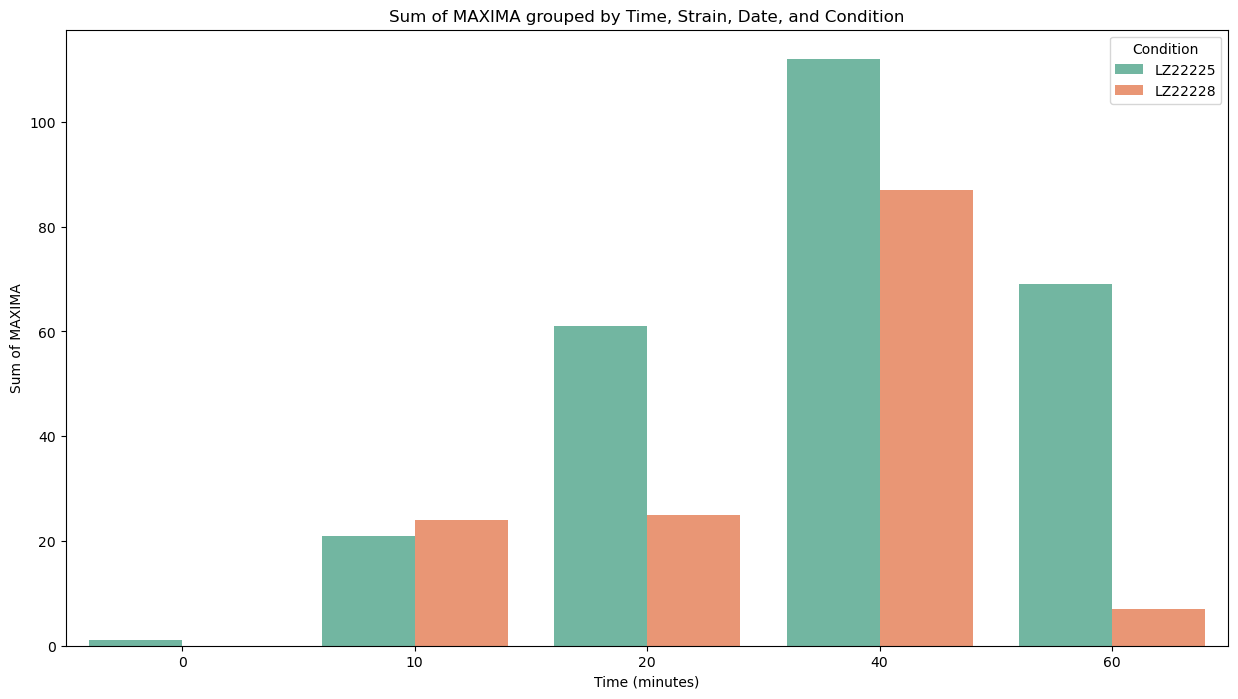

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sum of 'MAXIMA' for each group
grouped_data_sum_reset = grouped_data_sum.reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data_sum_reset, x='time', y='MAXIMA', hue='strain', ci=None, 
            palette="Set2", estimator=sum, 
            dodge=True, capsize=.2)
plt.title('Sum of MAXIMA grouped by Time, Strain, Date, and Condition')
plt.ylabel('Sum of MAXIMA')
plt.xlabel('Time (minutes)')
plt.legend(title='Condition')
plt.show()